# What is this dataset?
The data we're using comes from Google's [Quick, Draw!](https://quickdraw.withgoogle.com/) game. The user is presented with a word or phrase, which they have to draw within a 20 second time period. A neural network then makes a guess at what the user has drawn. In creating the game, Google also created a massive dataset of doodles/drawings.

The drawing process is recorded, so each drawing can be stored as a group of individual, sequential markings. A _useful_ thing to do with that data would be to look at the order in which the lines comprising each drawing were made and try to predict the drawing being made before it's even finished, but it's Google's job to be useful, not mine.

Lets load in some dogs and see what they look like.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rcParams['figure.figsize'] = (15, 15)

In [2]:
dogs = np.load('../data/full%2Fnumpy_bitmap%2Fdog.npy')

In [3]:
print(dogs[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   8
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  81 217 251 212 160  79   9  57 102  90  73
 134 146 124  97  74  48   3   0   0   0   0   0   0   0   0   0  85 253
 201 126 170 228 255 251 255 255 255 255 246 230 253 255 255 255 220  97
   4  13 135  18   0   0   0  23 246 187   5   0   0   2 179 252 156 180
 125  61   6   0   3  25  49  84 196 255 220 191 248  37   0   0   0  93
 255  40   0   0   0   2 234 154   0   0   0  28   6   0   0  86 205 155
  62  68 199 254 151   0   0   0   0 123 254   0   0   5 120 227 255  93
   0   7 192 248 174   1   0 112 255 243 253  71   

Doesn't look much like a dog to me...

Lets reshape the array to be a 28x28 grid and use `plt.imshow()` to display the numbers in each cell as pixel intensities.

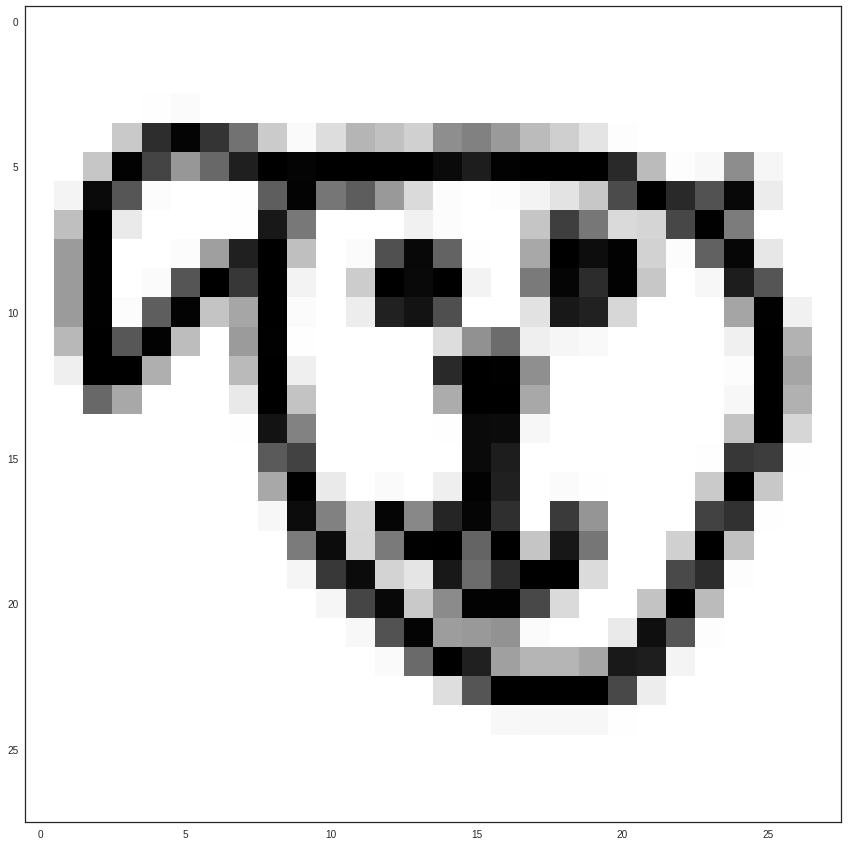

In [4]:
dogs = dogs.reshape(-1, 28, 28)
plt.imshow(dogs[0]);

Fab. Lets also load in some cats and faces.

In [5]:
cats = np.load('../data/full%2Fnumpy_bitmap%2Fcat.npy')
cats = cats.reshape(-1, 28, 28)

faces = np.load('../data/full%2Fnumpy_bitmap%2Fface.npy')
faces = faces.reshape(-1, 28, 28)

horses = np.load('/home/harrisonpim/Downloads/full%2Fnumpy_bitmap%2Fhorse.npy')
horses = horses.reshape(-1, 28, 28)

# UMAP
UMAP is a beautiful piece of work by [Leland McInnes](https://github.com/lmcinnes/umap). It's a dimensionality reduction technique, similar in application to the well known PCA or t-SNE. UMAP, though, is riduculously fast and efficient by comparison.

In [ ]:
import umap

In [ ]:
data = dogs

embedding = umap.UMAP().fit_transform(data.reshape(-1, 28*28)[:10000])

In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)
pd.DataFrame(embedding).plot.scatter(x=0, y=1);

### Cluster with sklearn

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(5)
cluster.fit(embedding);

In [ ]:
a = pd.DataFrame(embedding)
a['label'] = cluster.labels_

a.plot.scatter(x=0, y=1, c='label', cmap='Set1');

### Exploring the UMAP clusters' latent space

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)
n = 5

In [ ]:
n_within_cluster = a[a['label'] == 0].sample(n).index.values

f, axarr = plt.subplots(1, n)
for i in range(n):
    axarr[i].imshow(data[n_within_cluster[i]].reshape(28, 28))

In [ ]:
n_within_cluster = a[a['label'] == 1].sample(n).index.values

f, axarr = plt.subplots(1, n)
for i in range(len(axarr)):
    axarr[i].imshow(data[n_within_cluster[i]].reshape(28, 28))

In [ ]:
n_within_cluster = a[a['label'] == 2].sample(n).index.values

f, axarr = plt.subplots(1, n)
for i in range(len(axarr)):
    axarr[i].imshow(data[n_within_cluster[i]].reshape(28, 28))

In [ ]:
n_within_cluster = a[a['label'] == 3].sample(n).index.values

f, axarr = plt.subplots(1, n)
for i in range(len(axarr)):
    axarr[i].imshow(data[n_within_cluster[i]].reshape(28, 28))

In [ ]:
n_within_cluster = a[a['label'] == 4].sample(n).index.values

f, axarr = plt.subplots(1, n)
for i in range(len(axarr)):
    axarr[i].imshow(data[n_within_cluster[i]].reshape(28, 28))

Those look like pretty distinct clusters to me! 

Even though UMAP has no convolutional aspect to it (the input data is one dimensional!), it still manages to pick out some visibly different types of dog drawing!

Doing the same thing with horses and cats works phenomenally well too; cats give particularly nice clusters under UMAP. If you've cloned this work and are running it locally, set `data` to a new set of images to explore.